In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# LECTURA DE ARCHIVOS
bd_path = './'
bd_fallas_filename = 'bd_falla_summer.csv'
bd_op_filename = 'bd_op_summer2.csv'

In [3]:
dff = pd.read_csv(bd_path + bd_fallas_filename, parse_dates = True)

In [4]:
dfo = pd.read_csv(bd_path + bd_op_filename, parse_dates = True, index_col = 'time')

In [5]:
# limpieza
dff.describe()

Unnamed: 0       semana         total        falla  partida fallida
count  22458.000000  7325.000000  22458.000000  3442.000000      3503.000000
mean   11228.500000    39.921365      0.787983     0.443347         0.594062
std     6483.210509    11.085541      5.258164     0.499768         0.636945
min        0.000000     1.000000    -23.916667     0.000000         0.000000
25%     5614.250000    39.000000      0.107000     0.000000         0.000000
50%    11228.500000    43.000000      0.171000     0.000000         1.000000
75%    16842.750000    47.000000      0.393000     1.000000         1.000000
max    22457.000000    52.000000    252.025000     2.000000         5.000000

In [6]:
# solo SGMT, solo fallas no nulas, solo eventos marcados como fallas 
dff = dff.drop( dff[dff["falla"].isnull() | (dff.falla<0.5) | (dff.equipos != 'STMG')].index)
dff.describe()

Unnamed: 0      semana       total  falla  partida fallida
count    837.000000  485.000000  837.000000  837.0       820.000000
mean   10880.457587   32.701031    0.869309    1.0         0.009756
std     8687.816848   12.233240    1.116554    0.0         0.110067
min        2.000000    1.000000    0.030000    1.0         0.000000
25%     1439.000000   24.000000    0.300000    1.0         0.000000
50%     9625.000000   34.000000    0.533333    1.0         0.000000
75%    21641.000000   42.000000    1.066667    1.0         0.000000
max    22450.000000   52.000000   18.533333    1.0         2.000000

In [7]:
# conversion datos de fechas
dff["fecha fin"]=pd.to_datetime(dff["fecha fin"])
dff["fecha inicio"]=pd.to_datetime(dff["fecha inicio"])


In [8]:
# correccion 20016
# inicios con hora 00:00 se setean utilizando "total" a partir de fecha hora final
dff.loc[ (dff["fecha inicio"].dt.hour<0.5) & (dff["fecha inicio"].dt.year == 2016),"fecha inicio"] = dff["fecha fin"]-pd.to_timedelta(dff["total"],"h")

In [9]:
# corregir fallas donde la fecha de inicio sea anterior a la de termino
dff.loc[(dff["fecha inicio"]>=dff["fecha fin"]),"fecha inicio"] = dff["fecha fin"]
dff.loc[(dff["fecha inicio"]>=dff["fecha fin"]),"fecha fin"] = dff["fecha fin"]+pd.to_timedelta(dff["total"],"h")
dff.describe()

Unnamed: 0      semana       total  falla  partida fallida
count    837.000000  485.000000  837.000000  837.0       820.000000
mean   10880.457587   32.701031    0.869309    1.0         0.009756
std     8687.816848   12.233240    1.116554    0.0         0.110067
min        2.000000    1.000000    0.030000    1.0         0.000000
25%     1439.000000   24.000000    0.300000    1.0         0.000000
50%     9625.000000   34.000000    0.533333    1.0         0.000000
75%    21641.000000   42.000000    1.066667    1.0         0.000000
max    22450.000000   52.000000   18.533333    1.0         2.000000

In [10]:
# corregir fallas donde la fecha de termino no exite
dff.loc[(dff["fecha fin"].isnull()),"fecha fin"] = dff["fecha inicio"]+pd.to_timedelta(dff["total"],"h")
dff.describe()

Unnamed: 0      semana       total  falla  partida fallida
count    837.000000  485.000000  837.000000  837.0       820.000000
mean   10880.457587   32.701031    0.869309    1.0         0.009756
std     8687.816848   12.233240    1.116554    0.0         0.110067
min        2.000000    1.000000    0.030000    1.0         0.000000
25%     1439.000000   24.000000    0.300000    1.0         0.000000
50%     9625.000000   34.000000    0.533333    1.0         0.000000
75%    21641.000000   42.000000    1.066667    1.0         0.000000
max    22450.000000   52.000000   18.533333    1.0         2.000000

In [11]:
# solo fallas donde la fecha de inicio sea anterior a la de termino
dff = dff[dff["fecha inicio"]<=dff["fecha fin"]]
dff.describe()

Unnamed: 0      semana       total  falla  partida fallida
count    837.000000  485.000000  837.000000  837.0       820.000000
mean   10880.457587   32.701031    0.869309    1.0         0.009756
std     8687.816848   12.233240    1.116554    0.0         0.110067
min        2.000000    1.000000    0.030000    1.0         0.000000
25%     1439.000000   24.000000    0.300000    1.0         0.000000
50%     9625.000000   34.000000    0.533333    1.0         0.000000
75%    21641.000000   42.000000    1.066667    1.0         0.000000
max    22450.000000   52.000000   18.533333    1.0         2.000000

In [12]:
dff = dff[dff["especialidad"] != "MP"]
modos_de_falla = ["AFD","Alimentador","Carro shuttle","Cinta","Cinta-Desal","Coal Control"
                  ,"Monitor de Empalmes","Polines","Reductor 2500 KW","Sist. Frenos","Sist.Enfriamiento-Lub"]
#modos_de_falla = set(dff["modo de falla"].values)
dff = dff[dff["modo de falla"].isin(modos_de_falla)]
dff.describe()

Unnamed: 0      semana       total  falla  partida fallida
count    552.000000  318.000000  552.000000  552.0       543.000000
mean   11386.112319   32.943396    0.785236    1.0         0.009208
std     8729.686355   11.518053    1.020820    0.0         0.095604
min        2.000000    1.000000    0.030000    1.0         0.000000
25%     1655.750000   25.000000    0.300000    1.0         0.000000
50%     9954.000000   34.000000    0.530000    1.0         0.000000
75%    21726.500000   41.000000    1.000000    1.0         0.000000
max    22450.000000   52.000000   18.533333    1.0         1.000000

In [13]:
# indicatriz falla
dfo["falla"] = 0
for i, row in dff.iterrows():
    dfo.loc[row["fecha inicio"]:row["fecha fin"],"falla"] = 1 # marcar con 1 la falla

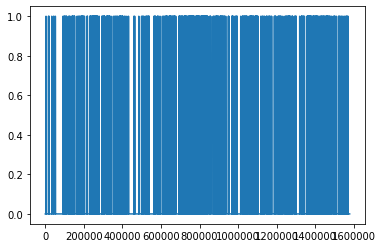

In [15]:
import matplotlib.pyplot
matplotlib.pyplot.plot(dfo["falla"].values)
matplotlib.pyplot.show()

In [23]:
# rellena los intervalos de funcionamiento con la fecha hasta la proxima falla
anterior = pd.to_datetime("2016-01-01 00:00:00")
dfo["falla futura"] = dfo.index[0]
dfo["falla anterior"] = dfo.index[-1]
for i, row in dff.iterrows():
    inicio,fin = row["fecha inicio"], row["fecha fin"]
    dfo.loc[anterior:inicio,"falla futura"] = inicio
    dfo.loc[anterior:inicio,"falla anterior"] = anterior
    anterior = fin

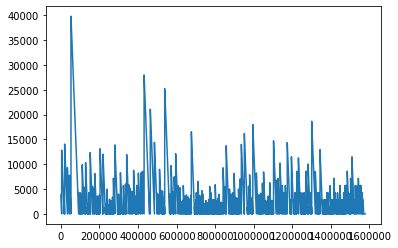

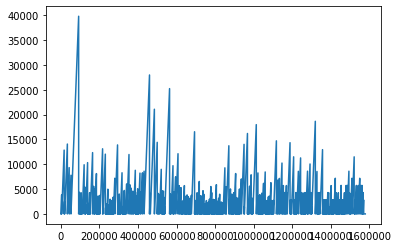

In [24]:
dfo["falla futura minutos"] = (dfo["falla futura"]-pd.to_datetime(dfo.index)).astype('timedelta64[m]')
dfo["falla futura minutos"] = [max(0.0,t) for t in dfo["falla futura minutos"]]
matplotlib.pyplot.plot(dfo["falla futura minutos"].values)
matplotlib.pyplot.show()
dfo["falla anterior minutos"] = (pd.to_datetime(dfo.index)-dfo["falla anterior"]).astype('timedelta64[m]')
dfo["falla anterior minutos"] = [max(0.0,t) for t in dfo["falla anterior minutos"]]
matplotlib.pyplot.plot(dfo["falla anterior minutos"].values)
matplotlib.pyplot.show()

In [25]:
# creacion de indicatrices por modo de falla
for i, row in dff.iterrows():
    modo,inicio,fin = row["modo de falla"],row["fecha inicio"],row["fecha fin"]
    if modo in modos_de_falla:
        if modo not in dfo.columns: dfo[modo] = 0 # crear nueva columna si no esta creada
        dfo.loc[inicio:fin,modo] = 1 # marcar con 1 la falla

AFD


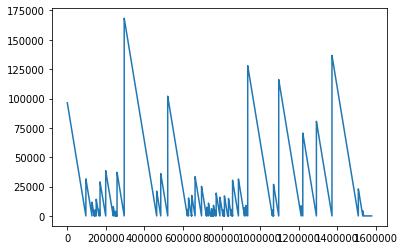

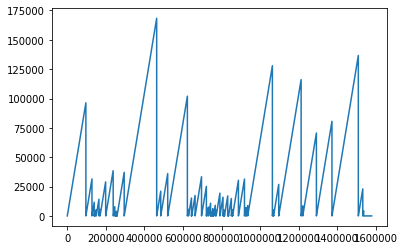

Alimentador


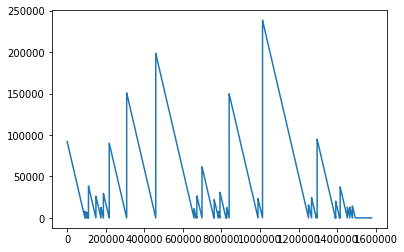

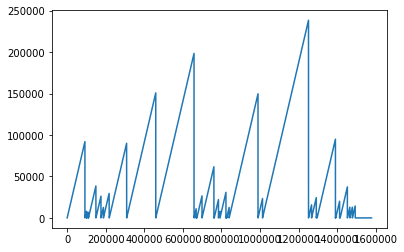

Carro shuttle


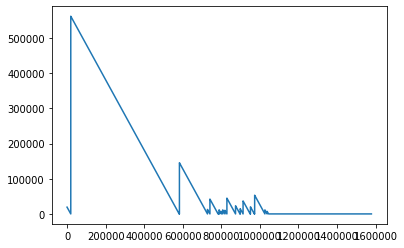

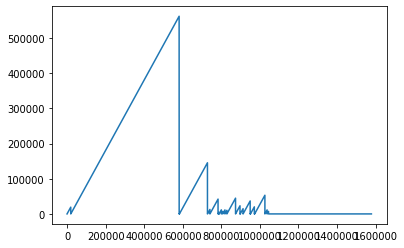

Cinta


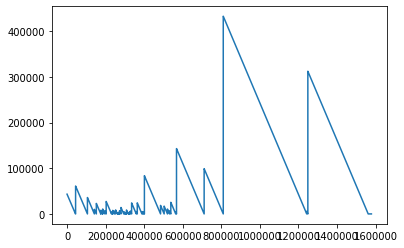

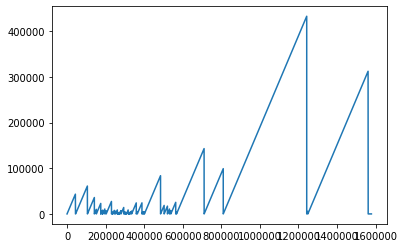

Cinta-Desal


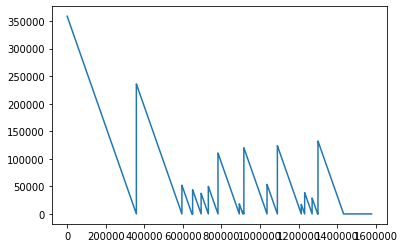

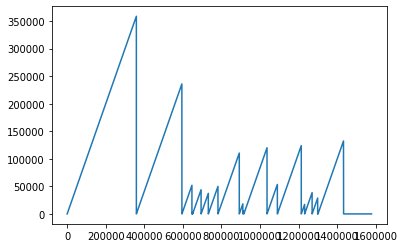

Coal Control


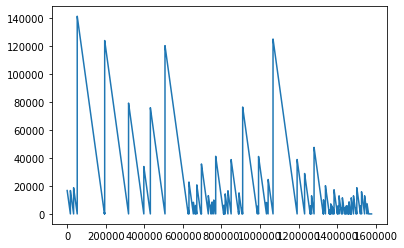

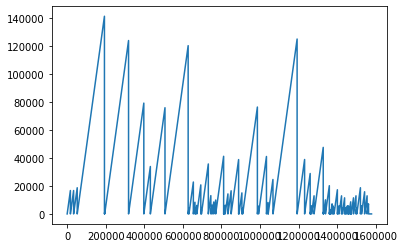

Monitor de Empalmes


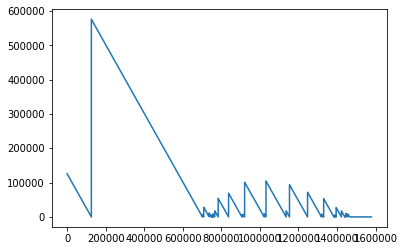

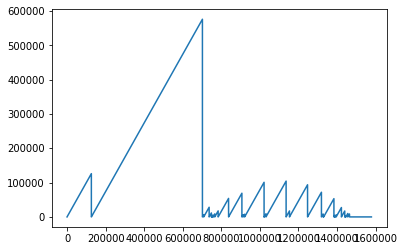

Polines


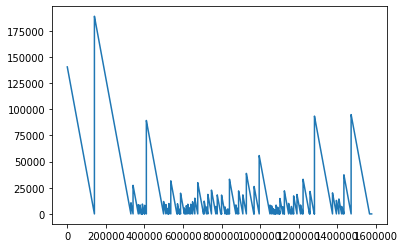

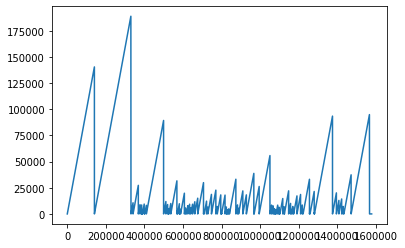

Reductor 2500 KW


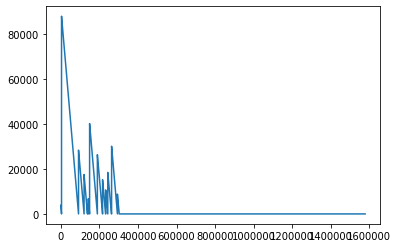

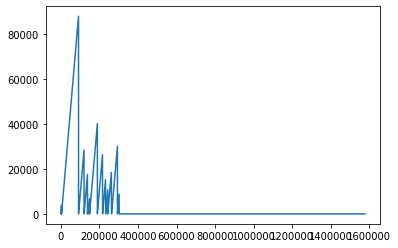

Sist. Frenos


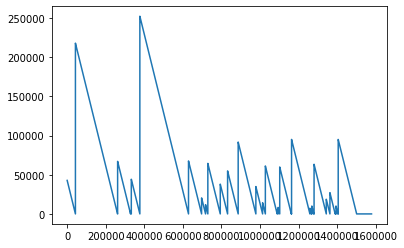

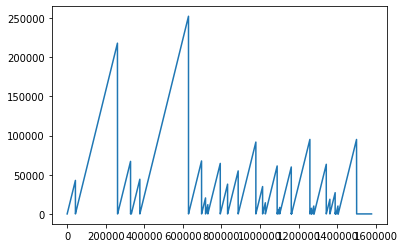

Sist.Enfriamiento-Lub


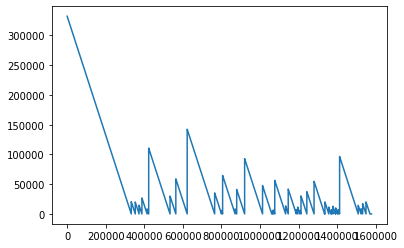

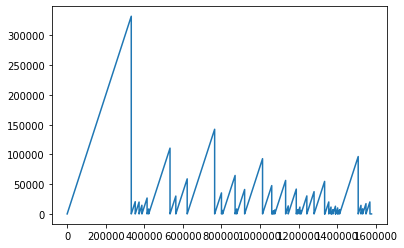

In [27]:
# rellena los intervalos de funcionamiento con la fecha hasta la proxima falla
# - los espacios durante falla quedan con basura
# - el ultimo intervalo no se rellena, ya que no sabe cuando ocurrira la siguiente falla
for modo in modos_de_falla:
    print(modo)
    col1 = "proxima falla %s" % modo
    col2 = "ultima falla %s" % modo
    dref = dff[ dff["modo de falla"] == modo ] 
    anterior = pd.to_datetime("2016-01-01 00:00:00")
    dfo[col1] = dfo.index[0]
    dfo[col2] = dfo.index[-1]
    for i, row in dref.iterrows():
        inicio,fin = row["fecha inicio"], row["fecha fin"]
        dfo.loc[anterior:inicio,col1] = inicio
        dfo.loc[anterior:inicio,col2] = anterior
        anterior = fin
    dfo[col1+" minutos"] = (dfo[col1]-dfo.index).astype('timedelta64[m]')
    dfo[col1+" minutos"] = [max(0.0,t) for t in dfo[col1+" minutos"]]
    matplotlib.pyplot.plot(dfo[col1+" minutos"].values)
    matplotlib.pyplot.show()
    dfo[col2+" minutos"] = (dfo.index-dfo[col2]).astype('timedelta64[m]')
    dfo[col2+" minutos"] = [max(0.0,t) for t in dfo[col2+" minutos"]]
    matplotlib.pyplot.plot(dfo[col2+" minutos"].values)
    matplotlib.pyplot.show()

In [28]:
dfo.to_csv('bd_rul_variablesoperacionales.csv')